In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:03<00:00, 2.15MB/s]


In [3]:
# Visit the Mars Temperature data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


In [4]:
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
table = html_soup.find('table', class_='table-striped')

In [6]:
marsweather = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
marsweather

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [7]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [8]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')[0]

df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
# Change data types 
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)


In [11]:
# Check data types again 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [12]:
#Finding the number of Months on Mars
mars_months=df['month'].nunique()
print(f'There are', mars_months ,'months on Mars.')

There are 12 months on Mars.


In [13]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
unique_marsdays=df['sol'].nunique()
firstday_mars =df['sol'].min()
lastday_mars=df['sol'].max()
print(f'There are', unique_marsdays, 'Martian days worth of data in the dataset, spreading from day', 
      firstday_mars,'to day', lastday_mars,'.')

There are 1867 Martian days worth of data in the dataset, spreading from day 10 to day 1977 .


In [22]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
min_tempave=[]

for i in range(1,mars_months+1):
    weather_per_month={"month_no":"","min_tempave":""}
    avg_min_temp_month=df.loc[df['month']==i]['min_temp'].mean()
    round_min_tempave_month = round(avg_min_temp_month,0)
    weather_per_month["month_no"] = i
    weather_per_month["min_tempave"] = round_min_tempave_month
    min_tempave.append(weather_per_month)    

print(min_tempave)    

[{'month_no': 1, 'min_tempave': -77.0}, {'month_no': 2, 'min_tempave': -80.0}, {'month_no': 3, 'min_tempave': -83.0}, {'month_no': 4, 'min_tempave': -83.0}, {'month_no': 5, 'min_tempave': -79.0}, {'month_no': 6, 'min_tempave': -75.0}, {'month_no': 7, 'min_tempave': -72.0}, {'month_no': 8, 'min_tempave': -68.0}, {'month_no': 9, 'min_tempave': -69.0}, {'month_no': 10, 'min_tempave': -72.0}, {'month_no': 11, 'min_tempave': -72.0}, {'month_no': 12, 'min_tempave': -74.0}]


In [23]:
# Export Python list to JSON file
import json
json_mars_min_temp = json.dumps(min_tempave)
# Save json as df file
df_mars_temp=pd.read_json(json_mars_min_temp)
df_mars_temp

,month_no,min_tempave
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


In [25]:
# Coolest month 
min_avg_temp = df_mars_temp['min_tempave'].min()
month_min_temp=df_mars_temp.loc[df_mars_temp['min_tempave']==min_avg_temp]
month_min_temp

,month_no,min_tempave
2,3,-83
3,4,-83


In [ ]:
Months 3 and 4 are coolest with temperature of -83 

In [26]:
# Warmest month 
max_avg_temp = df_mars_temp['min_tempave'].max()
month_max_temp=df_mars_temp.loc[df_mars_temp['min_tempave']==max_avg_temp]
month_max_temp

,month_no,min_tempave
7,8,-68


In [ ]:
Month 8 is warmest on Mars with temperature of -68

Text(0.5, 1.0, 'Avergae Mars Temperature by Month')

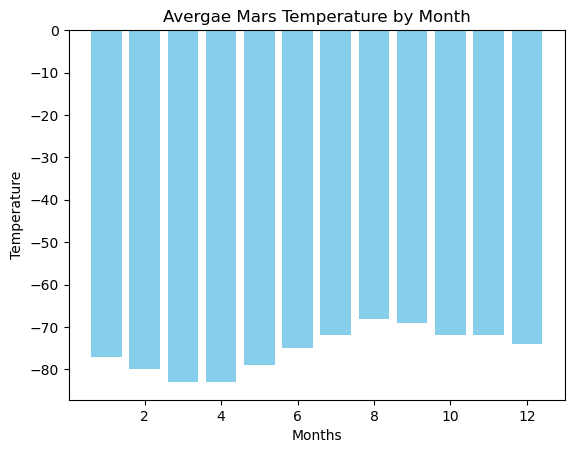

In [33]:
# Plot results
plt.bar(df_mars_temp['month_no'],df_mars_temp['min_tempave'], color='skyblue')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Temperature")

# Create title 
plt.title('Avergae Mars Temperature by Month')

In [34]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
# Grouping DataFrame by the average of pressure for each month
df_month=df.groupby('month')
df_mars_pressure=df_month.mean().loc[:,['pressure']]
df_mars_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [35]:
# The month with the lowest atmospheric pressure  
min_avg_pressure= df_mars_pressure['pressure'].min()
month_min_pressure=df_mars_pressure.loc[df_mars_pressure['pressure']==min_avg_pressure]
month_min_pressure

,pressure
month,
6,745.054422


In [36]:
# The month with the highest atmospheric pressure  
max_avg_pressure= df_mars_pressure['pressure'].max()
month_max_pressure=df_mars_pressure.loc[df_mars_pressure['pressure']==max_avg_pressure]
month_max_pressure

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Average Pressure by Month')

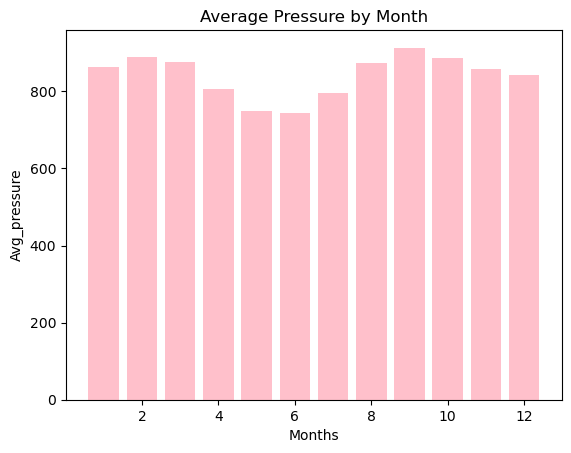

In [52]:
# Plot bar graph
x=range(1,13)
plt.bar(x,df_mars_pressure['pressure'], color= "pink")

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title 
plt.title('Average Pressure by Month')



In [53]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# sun longitude
long=df['ls'].loc[0]
long


155

In [54]:
same_long=df.loc[df['ls']==long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [58]:
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
import datetime as dt

Get=same_long['terrestrial_date'].loc[0]
date_after_one_martial_year = same_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-Get
print(f'In one Martial year',one_martial_year,'elapse on Earth')

In one Martial year 686 days 00:00:00 elapse on Earth


Text(0.5, 1.0, 'Daily minimum temperature')

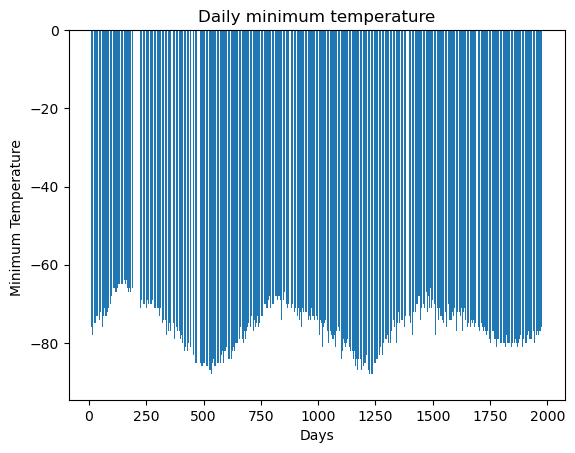

In [59]:
# Visually estimate the result by plotting the daily minimum temperature.
plt.bar(df['sol'],df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily minimum temperature')

In [60]:
df.to_csv('marsweather.csv',index=False)